# 1. Data
The original data came from the UCI machine learning repository. https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

# Attribute Information:
Thirteen (13) clinical features:

* age: age of the patient (years)
* anaemia: decrease of red blood cells or hemoglobin (boolean)
* high blood pressure: if the patient has hypertension (boolean)
* creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
* diabetes: if the patient has diabetes (boolean)
* ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
* platelets: platelets in the blood (kiloplatelets/mL)
* sex: woman or man (binary)
* serum creatinine: level of serum creatinine in the blood (mg/dL)
* serum sodium: level of serum sodium in the blood (mEq/L)
* smoking: if the patient smokes or not (boolean)
* time: follow-up period (days)
* [target] death event: if the patient deceased during the follow-up period (boolean)

In [4]:
import tensorflow
import tensorflow as tf
from tensorflow import  keras
from keras.wrappers.scikit_learn import KerasClassifier
#np.set_printoptions(precision=3, suppress=True)

import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")
import sklearn
import pandas as pd
import numpy as np
# To visualize the data Which help the reader to achieve quick insights.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
#To standardize the data
from sklearn.preprocessing import StandardScaler
# classification models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
## To Evaluate the Model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [5]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
df.shape

(299, 13)

# Finding Missing values

In [180]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [181]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# DEATH_EVENT
* 0----->not died
* 1----->died

<AxesSubplot:>

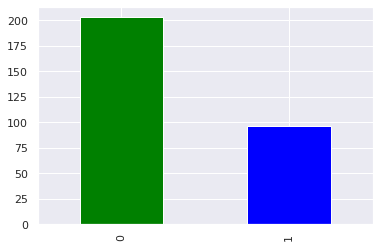

In [14]:
df["DEATH_EVENT"].value_counts().plot(kind="bar",color=["green", "blue"])

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:>

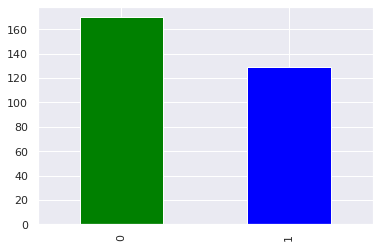

In [16]:
df["anaemia"].value_counts().plot(kind="bar",color=["green", "blue"])

In [17]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<AxesSubplot:>

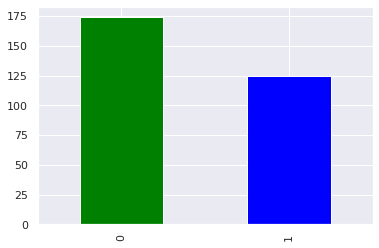

In [18]:
df["diabetes"].value_counts().plot(kind="bar",color=["green", "blue"])

# Heart failure Frequency for sex

In [19]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

# frequence
* 1---->male
* 0---->female

<AxesSubplot:>

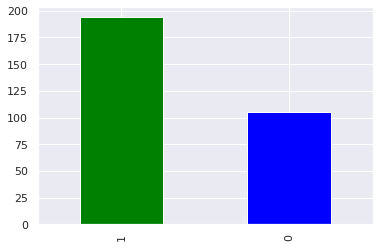

In [20]:
df["sex"].value_counts().plot(kind="bar",color=["green", "blue"])

# compare target column with sex colunm

In [182]:
pd.crosstab(df.DEATH_EVENT,df.sex)

sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


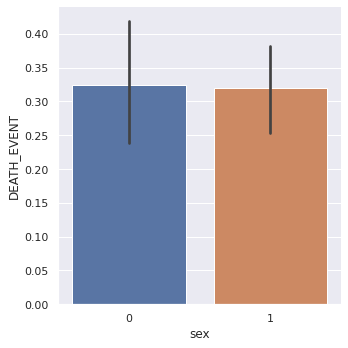

In [184]:
sns.catplot(data=df, kind="bar", x="sex", y="DEATH_EVENT")

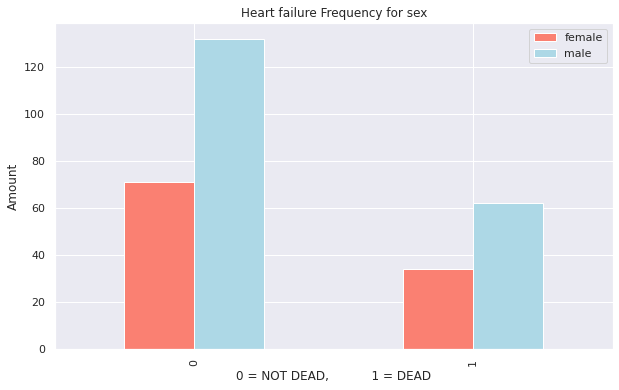

In [188]:
## creating a plot of crosstab
pd.crosstab(df.DEATH_EVENT,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart failure Frequency for sex")
plt.xlabel("0 = NOT DEAD,           1 = DEAD")
plt.ylabel("Amount")
plt.legend(["female","male"])

# Heart failure Frequency for anaemia

In [189]:
pd.crosstab(df.anaemia,df.DEATH_EVENT)

DEATH_EVENT,0,1
anaemia,,
0,120,50
1,83,46


In [21]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

<AxesSubplot:>

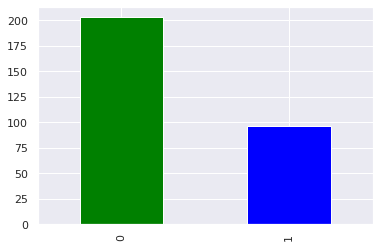

In [22]:
df["smoking"].value_counts().plot(kind="bar",color=["green", "blue"])

<AxesSubplot:>

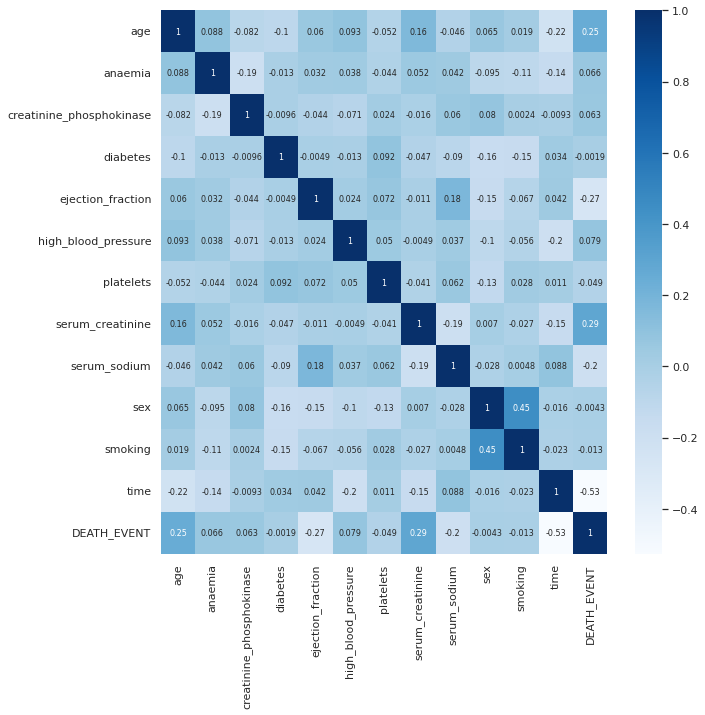

In [192]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True,annot_kws={'size':8},cmap='Blues')

# separating the features and target

In [155]:
x = df.drop(columns=['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [156]:
x.columns.value_counts()

age                         1
anaemia                     1
creatinine_phosphokinase    1
diabetes                    1
ejection_fraction           1
high_blood_pressure         1
platelets                   1
serum_creatinine            1
serum_sodium                1
sex                         1
smoking                     1
time                        1
dtype: int64

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5)

In [158]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
237,70.0,0,232,0,30,0,173000.0,1.2,132,1,0,210
21,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20
42,70.0,0,571,1,45,1,185000.0,1.2,139,1,1,33
181,59.0,1,176,1,25,0,221000.0,1.0,136,1,1,150
98,60.0,1,156,1,25,1,318000.0,1.2,137,0,0,85


In [159]:
print(x.shape, x_train.shape, x_test.shape)

(299, 12) (239, 12) (60, 12)


In [160]:
np.random.seed(5)
#tf.random.set_seed(5)

In [161]:
# data satandardization
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [162]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [163]:
x_train

array([[ 0.78694749, -0.88520172, -0.35812985, ...,  0.70267347,
        -0.74293206,  1.08905351],
       [ 0.36511628,  1.12968601, -0.47630519, ..., -1.42313613,
        -0.74293206, -1.37109572],
       [ 0.78694749, -0.88520172,  0.0270763 , ...,  0.70267347,
         1.34601809, -1.20276972],
       ...,
       [ 0.36511628,  1.12968601, -0.49334971, ..., -1.42313613,
        -0.74293206, -0.41293234],
       [-1.74403981, -0.88520172, -0.34449423, ..., -1.42313613,
        -0.74293206,  0.62291997],
       [-1.74403981,  1.12968601, -0.50698533, ..., -1.42313613,
        -0.74293206,  0.79124597]])

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [166]:
model = Sequential()

#input layer
model.add(Dense(12,activation='relu',input_shape=(12,)))

#hidden layer
model.add(Dense(50,activation='relu'))
 
#output layer

model.add(Dense(1,activation='sigmoid'))

In [167]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [168]:
model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7386 - accuracy: 0.4435
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7296 - accuracy: 0.4728
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7214 - accuracy: 0.4979
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.5146
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.5397
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5816
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5774
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5941
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6067
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6192
Epoch 11/100
4/4 [===========

# Test scores

In [169]:
scores = model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8000


In [170]:
print(scores)

[0.46630194783210754, 0.800000011920929]


# Training scores 

In [171]:
scores = model.evaluate(x_train,y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7699


In [172]:
yp = model.predict(x_test)
yp

2/2 [==============================] - 0s 2ms/step


array([[0.19523595],
       [0.40311474],
       [0.67288476],
       [0.25866842],
       [0.13520569],
       [0.4461602 ],
       [0.15763594],
       [0.31568867],
       [0.33154398],
       [0.2936785 ],
       [0.35556582],
       [0.32670847],
       [0.22106428],
       [0.28978363],
       [0.49569142],
       [0.41281688],
       [0.23923256],
       [0.44623098],
       [0.17091343],
       [0.18656635],
       [0.14045717],
       [0.42750105],
       [0.15779266],
       [0.17557783],
       [0.3630736 ],
       [0.16867493],
       [0.19655256],
       [0.61921066],
       [0.31758472],
       [0.28128833],
       [0.33553785],
       [0.554174  ],
       [0.1812534 ],
       [0.20556746],
       [0.10769109],
       [0.24351561],
       [0.1473603 ],
       [0.38482103],
       [0.27977136],
       [0.17453165],
       [0.6214916 ],
       [0.1507632 ],
       [0.48474112],
       [0.4841252 ],
       [0.41283232],
       [0.31173435],
       [0.36583963],
       [0.442

In [173]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [174]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [175]:
y_test[:5]

198    0
66     1
24     1
102    0
264    0
Name: DEATH_EVENT, dtype: int64

In [176]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        43
           1       1.00      0.29      0.45        17

    accuracy                           0.80        60
   macro avg       0.89      0.65      0.67        60
weighted avg       0.84      0.80      0.76        60



2/2 [==============================] - 0s 1ms/step


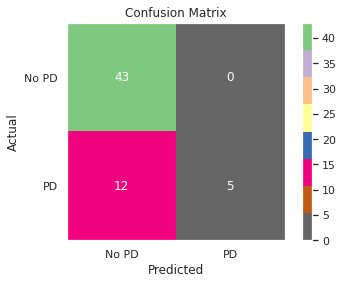

In [177]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)>0.5
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Accent_r)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No PD', 'PD'])
plt.yticks([0, 1], ['No PD', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.grid(False)
plt.show()

In [178]:
from sklearn.metrics import RocCurveDisplay

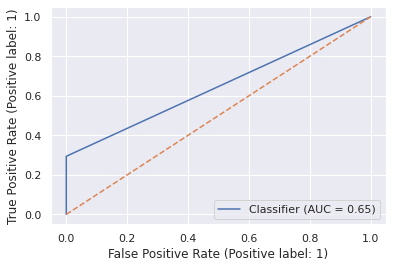

In [179]:
RocCurveDisplay.from_predictions(y_test,y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()